# Project 1: 
## Napoleon Paxton

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1 - I have completed the questions in the following cells. I have included the Big Query analysis beneath the answers.

1a. Show the number of trips in bikeshare_trips?

Answer: Then number of trips in bikeshare_trips is 983648.

In [2]:
%%bigquery

SELECT COUNT(*)
FROM bigquery-public-data.san_francisco.bikeshare_trips

Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.61s/rows]


,f0_
0,983648


1b. What are the number of status updated?

Answer: Then number of status updates are 107501619.

In [1]:
%%bigquery

SELECT COUNT(*)
FROM bigquery-public-data.san_francisco.bikeshare_status

Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.69s/rows]


,f0_
0,107501619


1c. What are the number of bikeshare stations?

Answer: The number of stations are 74.

In [3]:
%%bigquery

SELECT COUNT(*)
FROM bigquery-public-data.san_francisco.bikeshare_stations

Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.45s/rows]


,f0_
0,74


2. What is the earliest start date and latest end date and time for a trip?

Answer: Earliest start date is 2013-08-29 at 09:08:00 UTC and latest end date is 2016-08-31 at 23:48:00 UTC

In [16]:
%%bigquery

SELECT MIN(start_date), MAX(end_date)
FROM bigquery-public-data.san_francisco.bikeshare_trips

Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.25s/rows]


,f0_,f1_
0,2013-08-29 09:08:00+00:00,2016-08-31 23:48:00+00:00


3. How many bikes are there? 
Anwser: There are 700 bikes.

In [18]:
%%bigquery

SELECT COUNT(distinct bike_number)
FROM bigquery-public-data.san_francisco.bikeshare_trips

Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.45s/rows]


,f0_
0,700


## My Additional Questions

Questions are numbered 1 - 3 and answers are in Big Query MYSQL Code beneath them.

1. Give me the names of the bikeshare stations and the date they were installed.

Answer: There are 74 stations along with their installation date listed below in the query.

In [21]:
%%bigquery

SELECT name, installation_date
FROM bigquery-public-data.san_francisco.bikeshare_stations

Downloading: 100%|██████████| 74/74 [00:01<00:00, 49.20rows/s]


,name,installation_date
0,Santa Clara at Almaden,2013-08-06
1,Cowper at University,2013-08-14
2,University and Emerson,2013-08-15
3,Castro Street and El Camino Real,2013-12-31
4,Ryland Park,2014-04-09
...,...,...
69,2nd at Townsend,2013-08-22
70,Market at 10th,2013-08-23
71,Market at Sansome,2013-08-25
72,5th St at Folsom St,2016-08-04


2. Show the top 10 stations that have the most available bikes.

Answer: The top 10 station IDs with bikes available are: 90, 77, 2, 61, 67, 22, 50, 59, 69, and 55. 

In [36]:
%%bigquery

SELECT station_id, MAX(bikes_available) as bikes_per_station
FROM bigquery-public-data.san_francisco.bikeshare_status
GROUP BY station_id
ORDER BY bikes_per_station DESC
LIMIT 10

Downloading: 100%|██████████| 10/10 [00:01<00:00,  6.55rows/s]


,station_id,bikes_per_station
0,90,29
1,77,27
2,2,27
3,61,27
4,67,27
5,22,26
6,50,23
7,59,23
8,69,23
9,55,23


3. What station has the most bikes?

Answer: Station 90, 5th St at Folsom St.

In [26]:
%%bigquery
SELECT station_id, bikes_available
FROM bigquery-public-data.san_francisco.bikeshare_status
WHERE bikes_available = (SELECT MAX(bikes_available) FROM bigquery-public-data.san_francisco.bikeshare_status)
LIMIT 1

Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.52s/rows]


,station_id,bikes_available
0,90,29


In [30]:
%%bigquery
SELECT name
FROM bigquery-public-data.san_francisco.bikeshare_stations
WHERE station_id = 90

Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.57s/rows]


,name
0,5th St at Folsom St


# Part 2 - Querying Data from the BigQuery CLI

## Rerun the first 3 queries from Part 1

1. Show the number of trips in bikeshare_trips? I will use this as the size of the dataset since it is called out in the project.

Answer: Then number of trips in bikeshare_trips is 983648.

bq query --use_legacy_sql=false '
SELECT COUNT(*)
FROM 'bigquery-public-data.san_francisco.bikeshare_trips''

2. What is the earliest start date and latest end date and time for a trip?

Answer: Earliest start date is 2013-08-29 at 09:08:00 UTC and latest end date is 2016-08-31 at 23:48:00 UTC

bq query --use_legacy_sql=false '
SELECT MIN(start_date), MAX(end_date)
FROM 'bigquery-public-data.san_francisco.bikeshare_trips''

3. How many bikes are there? 
Anwser: There are 700 bikes.

bq query --use_legacy_sql=false '
SELECT COUNT(distinct bike_number)
FROM 'bigquery-public-data.san_francisco.bikeshare_trips''

## New Question: How many trips are in the morning vs in the afternoon?

Answer: There were 412339 trips in the morning. And there were 571309 trips in the evening.

bq query --use_legacy_sql=false '
SELECT COUNT(*) as morning
FROM 'bigquery-public-data.san_francisco.bikeshare_trips'
WHERE EXTRACT(HOUR FROM start_date) < 12'

bq query --use_legacy_sql=false '
SELECT COUNT(*) as evening
FROM 'bigquery-public-data.san_francisco.bikeshare_trips'
WHERE EXTRACT(HOUR FROM start_date) >= 12'


## Project Questions: Identify the main questions you'll need to answer to make recommendations (list below, add as many questions as you need.)

Question 1: What is the average duration of rides per evening commute? This will let us know how long the evening commute ride is.

Question 2: What is the average duration of rides per morning commute? This will let us know how long the morning commute ride is.

Question 3: How bike friendly are the likely paths around each station? This will give us an idea of how enjoyable rides are at each station.

Question 4: How many riders have been added as a result of the current offers/incentatives? This will tell us if the offers/incentatives are working.

Question 5: Which stations have the most riders? This will let us know what stations are most popular.

Question 6: What area attractions are available along each likely bike route? This will give us an idea of new potential partners for incentatives.

Question 7: What stations have the least amount of ridership? What stations need additional incentives to lure new or return riders.

Question 8: What commutes are the most popular. Between morning and evening commutes, which one presents the best opportunity to capitalize on the volume of riders?

## Answered Questions

1. What is the average duration of evening commute?

Answer: The duration of the evening commute is 1087.5 seconds

In [39]:
%%bigquery

select AVG(duration_sec) as evening_commute
from bigquery-public-data.san_francisco.bikeshare_trips
WHERE EXTRACT(HOUR FROM start_date) >= 12

Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.58s/rows]


,evening_commute
0,1087.499793


2. What is the average duration of morning commute?

Answer: The duration of the morning commute is 923.9 seconds

In [41]:
%%bigquery

select AVG(duration_sec) as morning_commute
from bigquery-public-data.san_francisco.bikeshare_trips
WHERE EXTRACT(HOUR FROM start_date) < 12

Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.13s/rows]


,morning_commute
0,923.929936


3. What stations have the most riders?

Answer: The top 10 stations with the most riders are IDs: 70, 69, 50, 60, 61, 55, 74, 77, 65, and 67. The name of the top station is San Francisco Caltrain (Townsend at 4th)

In [43]:
%%bigquery

SELECT start_station_id, COUNT(start_station_id) as trips_per_station
FROM bigquery-public-data.san_francisco.bikeshare_trips
GROUP BY start_station_id
ORDER BY trips_per_station DESC
LIMIT 10

Downloading: 100%|██████████| 10/10 [00:01<00:00,  7.25rows/s]


,start_station_id,trips_per_station
0,70,72683
1,69,56100
2,50,49062
3,60,41137
4,61,39936
5,55,39200
6,74,38531
7,77,35142
8,65,34894
9,67,30209


In [44]:
%%bigquery
SELECT name
FROM bigquery-public-data.san_francisco.bikeshare_stations
WHERE station_id = 70

Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.41s/rows]


,name
0,San Francisco Caltrain (Townsend at 4th)


4. What stations have the least amount of riders?

Answer: The top 10 stations with the most riders are IDs: 88, 91, 89, 90, 21, 24, 23, 26, 83, and 25. The least performing station is 5th S. at El Salvador St.

In [45]:
%%bigquery

SELECT start_station_id, COUNT(start_station_id) as trips_per_station
FROM bigquery-public-data.san_francisco.bikeshare_trips
GROUP BY start_station_id
ORDER BY trips_per_station
LIMIT 10

Downloading: 100%|██████████| 10/10 [00:01<00:00,  6.37rows/s]


,start_station_id,trips_per_station
0,88,20
1,91,69
2,89,84
3,90,173
4,21,241
5,24,272
6,23,373
7,26,463
8,83,467
9,25,931


In [46]:
%%bigquery
SELECT name
FROM bigquery-public-data.san_francisco.bikeshare_stations
WHERE station_id = 88

Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.17s/rows]


,name
0,5th S. at E. San Salvador St


5. What stations on the morning commute are the most popular?

Answer: The stations on the morning commute which are the most popular are IDs: 70, 69, 50, 55, 74, 73, 61, 67, 54, and 77.

In [48]:
%%bigquery

select start_station_id, COUNT(start_station_id) as morning_commute_count
from bigquery-public-data.san_francisco.bikeshare_trips
WHERE EXTRACT(HOUR FROM start_date) < 10
GROUP BY start_station_id
ORDER BY morning_commute_count DESC
LIMIT 10

Downloading: 100%|██████████| 10/10 [00:01<00:00,  7.44rows/s]


,start_station_id,morning_commute_count
0,70,43036
1,69,31913
2,50,22287
3,55,21360
4,74,15877
5,73,12802
6,61,12265
7,67,9371
8,54,9371
9,77,8524


6. What stations on the evening commute are the most popular?

Answer: The stations on the evening commute which are the most popular are IDs: 60, 61, 65, 70, 77, 74, 64, 69, 55, and 51. 

In [55]:
%%bigquery

select start_station_id, COUNT(start_station_id) as evening_commute_count
from bigquery-public-data.san_francisco.bikeshare_trips
WHERE EXTRACT(HOUR FROM start_date) between 15 and 18
GROUP BY start_station_id
ORDER BY evening_commute_count DESC
LIMIT 10

Downloading: 100%|██████████| 10/10 [00:01<00:00,  7.60rows/s]


,start_station_id,evening_commute_count
0,60,17933
1,61,16744
2,65,16692
3,70,15371
4,77,13600
5,74,12778
6,64,12238
7,69,11649
8,55,11579
9,51,11518


## What commuter trips are the most popular overall?

### I defined commuter trips as those taken in the morning from just past midnight to 10am for morning commute and from 1500 to 1800 (military time).

### The most popular commuter trips overall are IDs: 70, 69, 50, 55, 61, 74, 60, 65, 77, and 67.

### Below is a Big Query analysis which was pushed into a Pandas DataFrame that shows the top stations in terms of rides taken during commuting hours.

In [60]:
%%bigquery my_panda_data_frame

select start_station_id, COUNT(start_station_id) as combined_commute_count
from bigquery-public-data.san_francisco.bikeshare_trips
WHERE (EXTRACT(HOUR FROM start_date) between 15 and 18) OR (EXTRACT(HOUR FROM start_date) < 10)
GROUP BY start_station_id
ORDER BY combined_commute_count DESC
LIMIT 10

Downloading: 100%|██████████| 10/10 [00:01<00:00,  6.28rows/s]


In [61]:
my_panda_data_frame

,start_station_id,combined_commute_count
0,70,58407
1,69,43562
2,50,33377
3,55,32939
4,61,29009
5,74,28655
6,60,26289
7,65,24521
8,77,22124
9,67,20673


### The below histogram shows the distribution for the successful stations.

<AxesSubplot:>

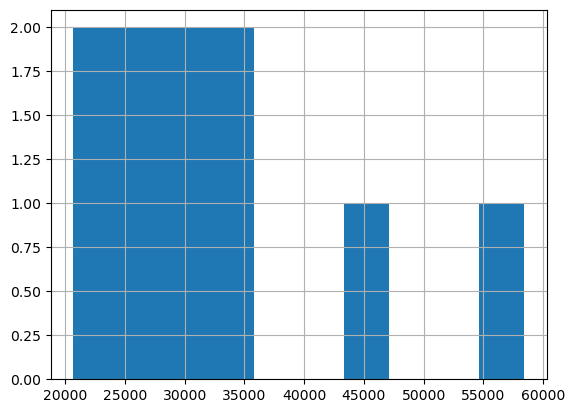

In [64]:
my_panda_data_frame.combined_commute_count.hist()

### The below graph shows the breakdown of the 10 most successful stations.

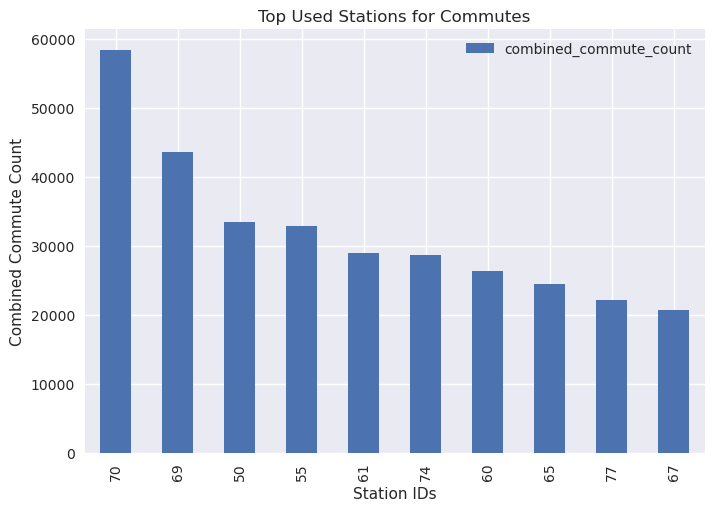

In [69]:
top_commute_stations = my_panda_data_frame

plt.style.use('seaborn')

top_commute_stations[['start_station_id', 'combined_commute_count']].groupby('start_station_id').sum().sort_values(by='combined_commute_count', ascending = False).plot(kind = 'bar')
plt.ylabel('Combined Commute Count')
plt.xlabel('Station IDs')
plt.title('Top Used Stations for Commutes')
plt.show()

### As a contrast the below Big Query analysis and Pandas DataFrame table shows the least successful stations based on riders during commutes.

In [70]:
%%bigquery low_use_station_panda_data_frame

select start_station_id, COUNT(start_station_id) as combined_commute_count
from bigquery-public-data.san_francisco.bikeshare_trips
WHERE (EXTRACT(HOUR FROM start_date) between 15 and 18) OR (EXTRACT(HOUR FROM start_date) < 10)
GROUP BY start_station_id
ORDER BY combined_commute_count
LIMIT 10

Downloading: 100%|██████████| 10/10 [00:01<00:00,  5.85rows/s]


In [71]:
low_use_station_panda_data_frame

,start_station_id,combined_commute_count
0,88,11
1,89,40
2,91,50
3,90,102
4,24,115
5,23,123
6,21,133
7,26,353
8,83,355
9,38,663


### The histogram below shows the distribution of the poor performing stations.

<AxesSubplot:>

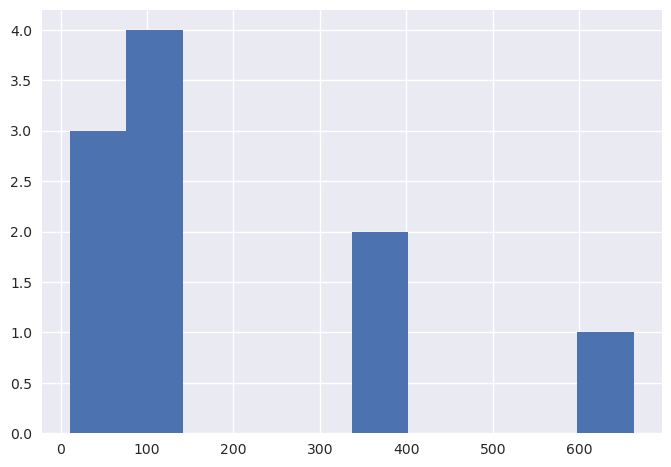

In [74]:
low_use_station_panda_data_frame.combined_commute_count.hist()

### The bar graph below shows the values of the bottom 10 performing stations.

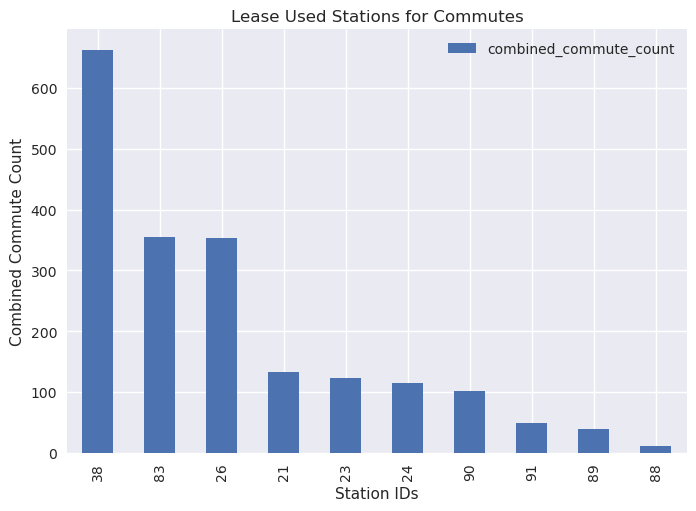

In [73]:
top_commute_stations = low_use_station_panda_data_frame

plt.style.use('seaborn')

top_commute_stations[['start_station_id', 'combined_commute_count']].groupby('start_station_id').sum().sort_values(by='combined_commute_count', ascending = False).plot(kind = 'bar')
plt.ylabel('Combined Commute Count')
plt.xlabel('Station IDs')
plt.title('Lease Used Stations for Commutes')
plt.show()

## Recommendations

### 1. We should attempt to identify as many commonalities and differences as possible between the high performing stations and the poor performing stations. What is the appeal of the high performing stations? What are the turnoffs of the low performing stations?

### 2. We should create localized specials/incentives instead of a broad set of specials/incentives. We need to make it more attractive to want to ride bikes out of the poor performing stations.

### 3. Promote tourist sites along the bike paths for all the stations. This should increase ridership across all stations.

### 4. Provide incentives for riding from different bike stations. One idea is to have something like a bingo board, where you get to fill in a box everytime you ride from a different station.

### 5. Charge more for higher performing commuter hours. I know its a hard sell, but it may be the best option if all else fails. People will more than likely keep riding if they are going to work.

### 6. Create partnerships with local and chain breakfast and dinner resturants. Since these shops will be on or near the path, it is likely commuters will want to stop both coming and going to work.